In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exoplanetsflux/exoTest.csv
/kaggle/input/exoplanetsflux/exoTrain.csv


# **Transit Exoplanets Detection with Deep Learning Models**

Scientists use data collected by space telescopes to find new information that allows us to learn more about the universe. The NASA Kepler Space Telescope has been collecting light from thousands of stars for many years to detect the presence of exoplanets.

![ Transit Method ](https://www.science-et-vie.com/wp-content/uploads/scienceetvie/2022/04/transit-planetaire-750x319.jpg) ![]()

An ExoPlanet is a planet that orbits a star, just like the Earth; however these systems are hundreds or thousands of light years away from Earth, so it is essential to have tools that can assist scientists in understanding whether a given star is likely to have exoplanets. The data collected by space telescopes is huge and new artificial intelligence techniques enable advanced data analysis and powerful predictive models.

In this project we used a dataset of exoplanets, coming from Mikulski Archive, a large archive of astronomical data for classifying the light curve of the stars to check the presence of the exoplanets. First of all, I'm going to apply different feature engineering techniques techniques to the dataset ant then we will present a Convolution Neural Network (CNN), which is a strong model in Deep Learning for time series classification (TSC). Sine the measure of brightness is a standard in this application, this predictive model can be useful for future works with other and new larger dataset.

# **About Dataset**

The data describe the change in flux (light intensity) of several thousand stars. Each Star has a binary label of 2 or 1. 2 indicated that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems.

As you can imagine, planets themeselves do not emit light, but the Stars that they orbit do. If said Star is watched over several months or years, there may be a regular "dimming"ofthe flux (the light intensity). This is evidence that there may be an orbiting body around the Star; such a star could be considered to be a "candidate" system. Further study of our candidate system, for example by a satellite that captures light at a different wavelenght, could solidity the belief that the candidate can in fact be "confirmed". 

# **Description**

TrainSet:
* 5087 rows or observations
* 3198 columns or features
* Column 1 is the label vector. Column 2 - 3198 are the flux values over time
* 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars

TestSet :
* 570 rows or observations
* 3198 columns or features
* Column 1 is the label vector. Column 2 - 3198 are the flux values over time
* 5 confirmed exoplanet-stars and 565 non-exoplanet-stars

# **Acknowledgements**

The data presented here are cleaned and are derived from observations made by the NASA Kepler Space Telescope. The Mission is ongoing - for instance data from Campaign 12 was released on 8th Marth 2017. Over 99% of this dataset originates from Campaign 3. To boost the number of exoplanet-stars in the dataset, confirmed exoplanets from other campaigns were also included.

To be clear, all observations from Campaign 3 are included. And in addition to this, confirmed exoplanet-stars from other campaigns are also included.

The datasets were prepared late-summer 2016. 

Campaign 3 was used because "it was felt" that this Campaign is unlikely to contain any undiscovered (i.e. wrongly labelled) exoplanets.

NASA open-sources the original Kepler Mission data and it is hosted at the Mikulsi Archive. After being beamed down to Earth, NASA applies de-noising algorithms to remove artefacts generated by the telescope. The data - in the astrophysicist, anyone with an ineternet connection can embark on a search to find and retrieve the datafiles from the Archive.

The Transit Method Descriptive image is copyright @ 2021 by [Science & Vie](https://www.science-et-vie.com)

In [76]:
# Import data analysis Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from scipy import signal #
from scipy.ndimage.filters import gaussian_filter
from scipy.fftpack import fft
import scipy
import seaborn as sns # data visualization
# import models as m # model creation package

# Import Machine Learning and Deep Learninig packages
#import sklearn.linear_model as lm
#import tensorflow as tf
#import sklearn.svm as svm

#from tensorflow.keras import models
#from tensorflow.keras import layers
#from tensorflow.keras.preprocessing import sequence

# Model evaluation methods
import sklearn.preprocessing as pproc
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import normalize

from imblearn.over_sampling import RandomOverSampler

In [50]:
# Display Tensorflow version
print(tf.__version__)

2.6.4


In [51]:
# Import the dataset
data_train = pd.read_csv('/kaggle/input/exoplanetsflux/exoTrain.csv') # TrainSet
data_test = pd.read_csv('/kaggle/input/exoplanetsflux/exoTest.csv')

In [53]:
# Data Analysis
data_train.head(-5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,1,125.57,78.69,98.29,91.16,78.42,45.82,61.69,22.73,39.09,...,32.35,63.23,57.98,90.43,115.12,210.09,3.80,16.33,27.35,21.30
5078,1,7.45,10.02,6.87,-2.82,-1.56,-4.30,-7.01,-6.97,-2.54,...,-5.25,-8.56,0.53,-4.29,-6.60,8.75,-10.69,-9.54,-2.48,-8.69
5079,1,475.61,395.50,423.61,376.36,338.94,321.26,326.34,342.84,251.23,...,543.25,453.87,344.35,266.16,242.18,163.02,86.29,13.06,161.22,213.60
5080,1,-46.63,-55.39,-64.88,-88.75,-75.40,-64.06,-66.37,-41.95,-68.07,...,29.64,6.90,32.94,56.63,28.71,28.82,-20.12,-14.41,-43.35,-30.04


In [54]:
# Permute the dataset
data_train = np.random.permutation(np.asarray(data_train))
data_test = np.random.permutation(np.asarray(data_test))

In [55]:
# Get the label column and delete the class column and rescale
y1 = data_train[:,0]
y2 = data_test[:,0]

y_train = (y1 - min(y1)) / (max(y1) - min(y1))
y_test = (y2- min(y2)) / (max(y2) - min(y2))

data_train = np.delete(data_train,1,1)
data_test = np.delete(data_test,1,1)

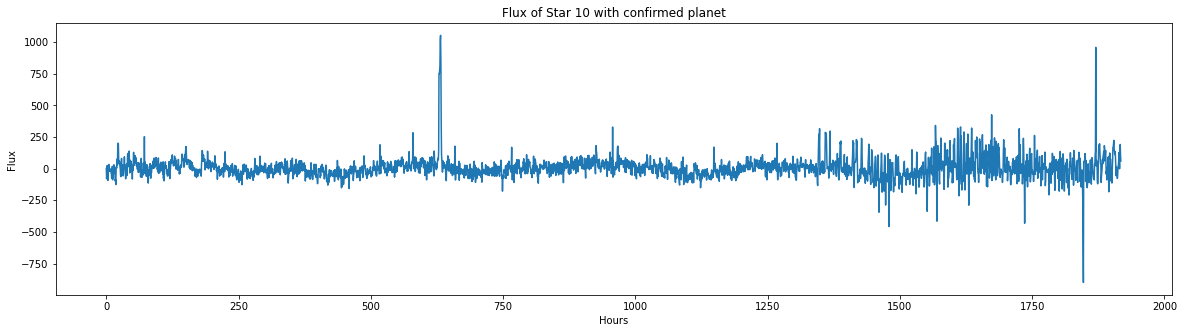

In [56]:
# Print the light curve
time = np.arange(len(data_train[0])) * (36/60) # time in hours

plt.figure(figsize=(20,5))
plt.title('Flux of Star 10 with confirmed planet')
plt.ylabel('Flux')
plt.xlabel('Hours')
plt.plot(time, data_train[10]) # Change the number to plot what you want

In [57]:
# Normalized data
data_train_norm = normalize(data_train)
data_test_norm = normalize(data_test)

In [58]:
# Function to apply gaussian filter to all data
def gauss_filter(dataset, sigma):
    dts = []
    for x in range(dataset.shape[0]):
        dts.append(gaussian_filter(dataset[x], sigma))
        
    return np.asarray(dts)

In [59]:
# Apply the gaussian filter to all rows data
data_train_gaussian = gauss_filter(data_train_norm,7.0)
data_test_gaussian = gauss_filter(data_test_norm,7.0)

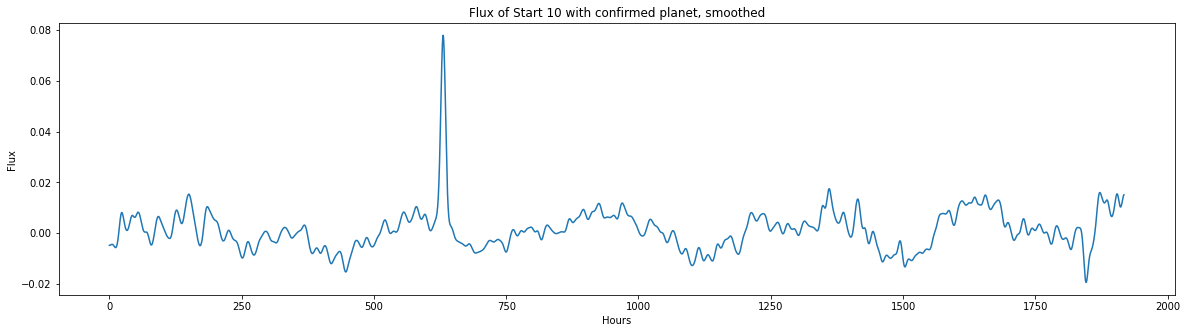

In [63]:
# Print the light curves smoothed
plt.figure(figsize=(20,5))
plt.title('Flux of Start 10 with confirmed planet, smoothed')
plt.ylabel('Flux')
plt.xlabel("Hours")
plt.plot(time, data_train_gaussian[10])

In [65]:
# Apply FFT to the data smoothed
frequency = np.arange(len(data_train[0])) * (1/(36.0*60.0))

data_train_fft1 = scipy.fft.fft2(data_train_norm, axes=1)
data_test_fft1 = scipy.fft.fft2(data_test_norm, axes=1)

data_train_fft = np.abs(data_train_fft1) # calculate the abs value
data_test_fft = np.abs(data_test_fft1)

In [66]:
# Get the lenght of the FFT data, make something here below in order to make the sequences of the same size
# only if they have differet dimensions
len_seq = len(data_train_fft[0])

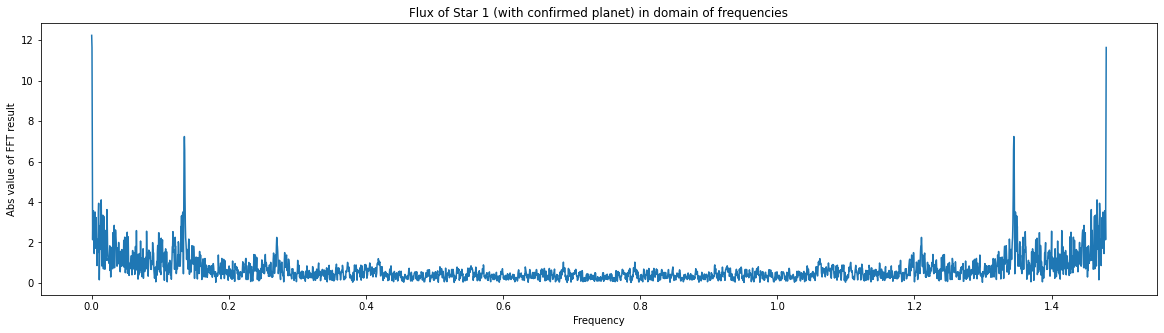

In [67]:
# Plot the FFT of the signals
plt.figure(figsize=(20,5))
plt.title('Flux of Star 1 (with confirmed planet) in domain of frequencies')
plt.ylabel('Abs value of FFT result')
plt.xlabel('Frequency')
plt.plot(frequency, data_train_fft[1])

In [72]:
# Oversampling technique to the data
rm = RandomOverSampler(sampling_strategy=0.5)
data_train_ovs, y_train_ovs = rm.fit_resample(data_train_fft, y_train)

In [73]:
# Recap dataset after ovesampling
print("After oversampling, counts of label '1': {}".format(sum(y_train_ovs==1)))
print("After oversampling, counts of label '0': {}".format(sum(y_train_ovs==0)))

After oversampling, counts of label '1': 2525
After oversampling, counts of label '0': 5050


In [74]:
# Reshape the data for the neural network model
data_train_ovs = np.asarray(data_train_ovs)
data_test_fft = np.asarray(data_test_fft)

In [75]:
data_train_ovs_nn = data_train_ovs.reshape((data_train_ovs.shape[0], data_train_ovs.shape[1], 1))
data_test_fft_nn = data_test_fft.reshape((data_test_fft.shape[0], data_test_fft.shape[1], 1))

In [77]:
# Import all modules for models creation
import tensorflow as tf
import pydot

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils.vis_utils import plot_model

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


#create the neural network
def FCN_model(len_seq):
    
    # len_seq = the size of the input sequences
    
    model = tf.keras.Sequential()
    
    #change the input shape if you have sequences less long
    model.add(layers.Conv1D(filters=256, kernel_size=8, activation='relu', input_shape=(len_seq,1)))
    model.add(layers.MaxPool1D(strides=5))
    model.add(layers.BatchNormalization())
    
    
    model.add(layers.Conv1D(filters=340, kernel_size=6, activation='relu'))
    model.add(layers.MaxPool1D(strides=5))
    model.add(layers.BatchNormalization())
    
    
    model.add(layers.Conv1D(filters=256, kernel_size=4, activation='relu'))
    model.add(layers.MaxPool1D(strides=5))
    model.add(layers.BatchNormalization())
    
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    
    
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(12, activation='relu'))
    
    
    model.add(layers.Dense(8, activation = 'relu'))
    
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model



#create the SVC model
def SVC_model():
    
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    
    clf = GridSearchCV( SVC(), param_grid = tuned_parameters,scoring = 'recall')
    
    
    return clf

In [78]:
# Create F.C.N model and run it
model = FCN_model(len_seq)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

print(model.summary())

history = model.fit(data_train_ovs_nn, y_train_ovs , epochs=15, batch_size = 10, validation_data=(data_test_fft_nn, y_test))

2022-06-04 14:45:30.395920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 14:45:30.539557: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 14:45:30.540308: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-04 14:45:30.541502: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3190, 256)         2304      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 638, 256)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 638, 256)          1024      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 633, 340)          522580    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 127, 340)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 340)          1360      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 124, 256)          3

2022-06-04 14:45:33.704953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-06-04 14:45:35.725775: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


758/758 [==============================] - 17s 12ms/step - loss: 0.1499 - accuracy: 0.9345 - val_loss: 0.0324 - val_accuracy: 0.9912
Epoch 2/15
758/758 [==============================] - 9s 12ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0235 - val_accuracy: 0.9930
Epoch 3/15
758/758 [==============================] - 9s 12ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0288 - val_accuracy: 0.9895
Epoch 4/15
758/758 [==============================] - 9s 12ms/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 0.0199 - val_accuracy: 0.9912
Epoch 5/15
758/758 [==============================] - 9s 11ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.0154 - val_accuracy: 0.9965
Epoch 6/15
758/758 [==============================] - 8s 11ms/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0048 - val_accuracy: 0.9965
Epoch 7/15
758/758 [==============================] - 9s 12ms/step - loss: 0.0165 - accuracy: 0.9933 - val_loss: 0.0175 - val_accuracy: 0.9947
Epoch 8/1

In [81]:
# Save the model
# model.save("/kaggle/working/exoplanetflux_model_1")
# Save  -format using the HDF5 standard. 
#model.save("/kaggle/working/exoplanetflux_model_1.h5")
#load the model if already exsist
#model = tf.keras.models.load_model("/kaggle/working/exoplanetflux_model_1.h5")

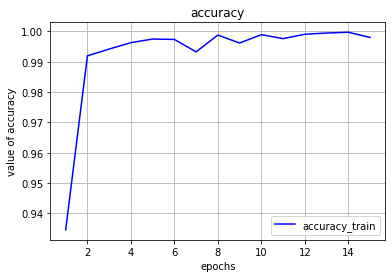

In [84]:
# Plot Accuracy
acc = history.history['accuracy']
#acc_val = history.history['val_accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='accuracy_train')
#plt.plot(epochs, acc_val, 'g', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

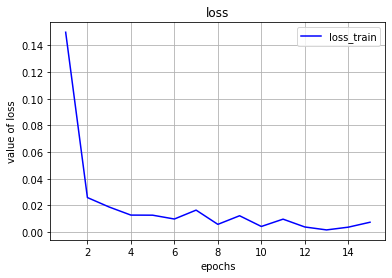

In [85]:
# Plot Loss
loss = history.history['loss']
#loss_val = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'b', label='loss_train')
#plt.plot(epochs, loss_val, 'g', label='loss_val')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('value of loss')
plt.legend()
plt.grid()
plt.show()

accuracy :  0.9964912280701754
                         precision    recall  f1-score   support

 NO exoplanet confirmed       1.00      1.00      1.00       565
YES exoplanet confirmed       1.00      0.60      0.75         5

               accuracy                           1.00       570
              macro avg       1.00      0.80      0.87       570
           weighted avg       1.00      1.00      1.00       570



<AxesSubplot:>

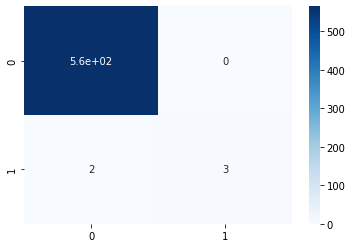

In [86]:
#predict the test set and plot results
y_test_pred = model.predict(data_test_fft_nn)
y_test_pred = (y_test_pred > 0.5)


accuracy = accuracy_score(y_test, y_test_pred)
print("accuracy : ", accuracy)

print(classification_report(y_test, y_test_pred, target_names=["NO exoplanet confirmed","YES exoplanet confirmed"]))

conf_matrix = confusion_matrix([int(x) for x in y_test ], [int(y) for y in y_test_pred ])
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

# Result 
The CNN has achieved good results. With all the problems written above with a sufficient number of epochs (according to our tests they must be greater than 15) the model is able to detect 5 exoplanet in the test set ( 100 % accuracy ).

# Future work
In the field of applied astrophysics the transit detection of exoplanets is an important technique for the discovery of new planets. It would be very interesting to test our models ( in particular CNN ) in new larger datasets. Recall that in the MAST archive ( Mikulski Archive for Space Telescopes ) it is possible to obtain the light curves of thousands of other stars collected by the kepler telescope. However these data are not in a form directly usable by a machine learning model and therefore would require to be downloaded and processed to extract the light curves. In this project due to a limited time it was not possible to test the models with new datasets. In case someone would like to do this the code has been constructed to be able to change a number of reduced variables to adapt the models to new datasets.

# **THANKS YOU**